In [ ]:
pip install u8darts

#Minha primeira experiência com série temporal


Para me familiarizar com os conceitos série temporal segui o tutorial do darts e assisti alguns vídeo sobre quais as técnicas usadas, como média geral, exponential smoothing e LSTMs 

In [ ]:
#aprender dart
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('AirPassengers.csv', delimiter=",")
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
train, val = series.split_after(pd.Timestamp('19580101'))

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Text(0.5, 0, 'Ano')

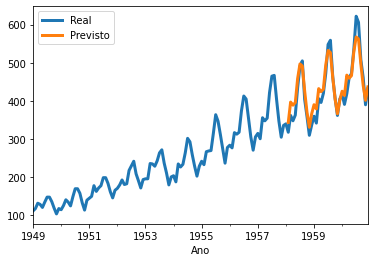

In [ ]:
import matplotlib.pyplot as plt

series.plot(label='Real', lw=3)
prediction.plot(label='Previsto', lw=3)
plt.legend()
plt.xlabel('Ano')

#Aplicar no modelo com multi-variáveis uma CNN para classificação


In [17]:
#Solução que encontrei no Kaggle usando CNNs
#achei mais fácil aplicar uma CNN devido a minha maior experiência com elas
import numpy as np 
import pandas as pd 
from scipy.spatial.distance import pdist, squareform
import sklearn as sk
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU
from keras import metrics
from keras import backend as K
import time
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils import np_utils

In [18]:
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

## gráficos de recorrência



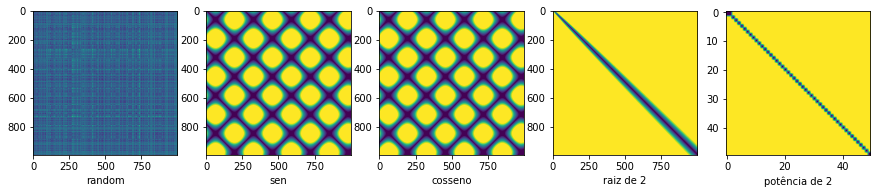

In [22]:
#transformar uma série temporal em uma imagem para depois usar uma CNN para classificar, conceito que achei genial
from math import sqrt
fig = plt.figure(figsize=(15,14))
random_series = np.random.random(1000)
ax = fig.add_subplot(1, 5, 1)
ax.imshow(recurrence_plot(random_series[:,None]))
ax.set_xlabel("random")
sinus_series = np.sin(np.linspace(0,24,1000))
ax = fig.add_subplot(1, 5, 2)
ax.imshow(recurrence_plot(sinus_series[:,None]))
ax.set_xlabel("sen")
cos_series = np.cos(np.linspace(0,24,1000))
ax = fig.add_subplot(1, 5, 3)
ax.imshow(recurrence_plot(sinus_series[:,None]))
ax.set_xlabel("cosseno")
eq = np.array([sqrt(x) for x in range(1000)])
ax = fig.add_subplot(1, 5, 4)
ax.imshow(recurrence_plot(eq[:, None]))
ax.set_xlabel("raiz de 2")
pow2 = np.array([x**x for x in range(50)])
ax = fig.add_subplot(1, 5, 5)
ax.imshow(recurrence_plot(pow2[:, None]))
ax.set_xlabel("potência de 2");

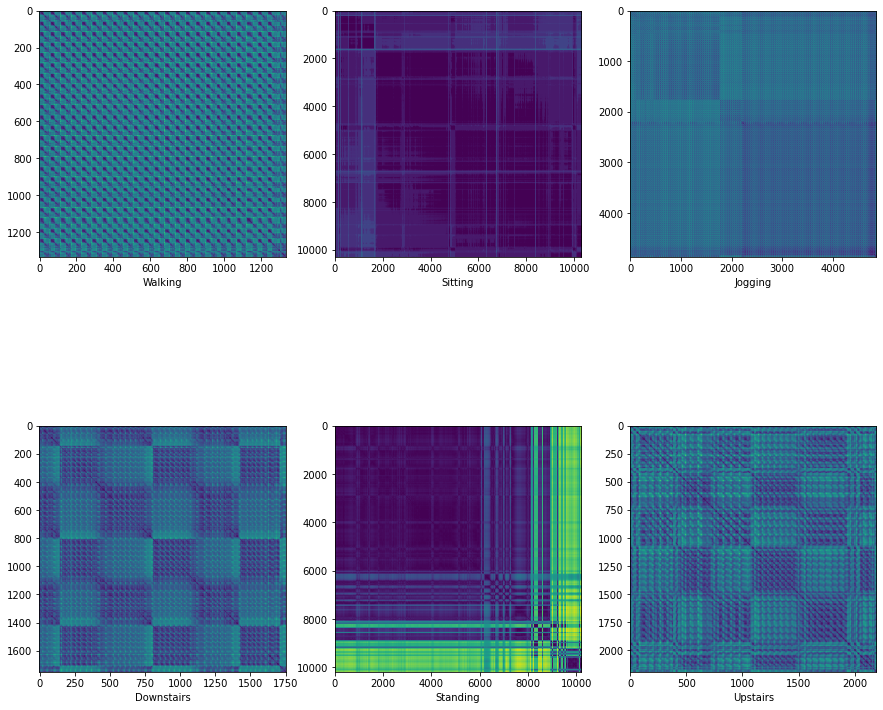

In [4]:
cols = ["attitude.roll","attitude.pitch","attitude.yaw","gravity.x","gravity.y","gravity.z","rotationRate.x","rotationRate.y","rotationRate.z","userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/wlk_15/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Walking')
ax = fig.add_subplot(2, 3, 2)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/sit_5/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Sitting')
ax = fig.add_subplot(2, 3, 3)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/jog_9/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Jogging')
ax = fig.add_subplot(2, 3, 4)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/dws_1/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Downstairs')
ax = fig.add_subplot(2, 3, 5)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/std_6/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Standing')
ax = fig.add_subplot(2, 3, 6)
ax.imshow(recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/ups_3/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Upstairs');

###No Kaggle usaram classificação de apenas três classes, vamos usar as 6

In [5]:
#hash maps são mais rápidos que arrays
class_translate = {"dws_1" : 0, "dws_2" : 0, "dws_11" : 0,  \
                   "ups_3" : 1, "ups_4" : 1, "ups_12" : 1, \
                   "wlk_7" : 2, "wlk_8" : 2, "wlk_15" : 2, \
                   "jog_9" : 3, "jog_16" : 3, \
                   "std_6" : 4, "std_14" : 4, \
                   "sit_5" : 5, "sit_13": 5}

#pre allocate arrays
x_train = np.zeros((384,32,32))
y_train = np.zeros(384)
c = 0
start = time.time()
for i in class_translate.keys():    
    print("Processing set " + i)
    for j in range(1,25):
        dat = recurrence_plot(pd.read_csv("drive/My Drive/A_DeviceMotion_data/" + i +"/" + "sub_"+ str(j) + ".csv")[cols].values, steps=100)
        dat = resize(dat, (32,32),mode='constant')
        print("Sub", j,"completo!")
        x_train[c,:,:] = dat
        y_train[c] = class_translate[i]
        c += 1
end = time.time()
print('Elapsed time:')
print(end - start)

Processing set dws_1
Processing set dws_2
Processing set dws_11
Processing set ups_3
Processing set ups_4
Processing set ups_12
Processing set wlk_7
Processing set wlk_8
Processing set wlk_15
Processing set jog_9
Processing set jog_16
Processing set std_6
Processing set std_14
Processing set sit_5
Processing set sit_13
Elapsed time:
11473.37244939804


https://arxiv.org/pdf/1710.00886.pdf no kaggle ele usou a arquitetura deste artigo. Talvez seja possível usar transfer learning para melhorar ainda mais a matriz de confusão, mas é experimental

In [10]:
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,32,32), data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
#reshape to include depth
X_train = x_train.reshape(x_train.shape[0], 1, 32,32)
#convert to float32 and normalize to [0,1]
X_train = X_train.astype('float32')
X_train /= np.amax(X_train)
# convert labels to class matrix, one-hot-encoding
Y_train = np_utils.to_categorical(y_train, 6)
# split in train and test set
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1)

In [12]:
model.fit(X_train, Y_train, epochs=200, batch_size=16,shuffle=True)

Epoch 1/200
22/22 [==============================] - 0s 5ms/step - loss: 1.7461 - accuracy: 0.2493
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 1.6375 - accuracy: 0.2957
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 1.5667 - accuracy: 0.2754
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4384 - accuracy: 0.3217
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 1.3782 - accuracy: 0.3681
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 1.3315 - accuracy: 0.3652
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 1.3454 - accuracy: 0.3884
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 1.2718 - accuracy: 0.4290
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 1.2713 - accuracy: 0.4261
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 1.2323 - accuracy: 0.4551
Epoch 11/

In [15]:
predictions= model.predict(x_test)
rounded = [np.argmax(x) for x in predictions]
print(K.eval(metrics.categorical_accuracy(y_test, np_utils.to_categorical(rounded, 6))))

[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
